In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

In [2]:
birthDF = pd.read_csv('data/births.csv', index_col='year')
# birthDF.columns = birthDF.columns.str.strip()
# birthDF.index = birthDF.index.str.strip()
birthDF

,boys,girls
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [3]:
# 01. 남아 ,여아 출생 평균을 구하시요
birthDF.mean().round(2)

boys     1225776.07
girls    1245399.21
dtype: float64

2. 남아 수가 평균보다 많은 연도만 출력하시오.

In [5]:
m = birthDF[' boys'].mean()
birthDF.query( '` boys`>@m') #한글이나 공백있는 컬럼은 ``

,boys,girls
year,,
1921,1232999,1101457
1924,1248876,1132751
1942,1350545,1380774
1943,1395082,1426846
1944,1327104,1362555
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [7]:
birthDF[ birthDF[' boys']> birthDF[' boys'].mean()].index

Index([1921, 1924, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
      dtype='int64', name='year')

3. 남아출생이 가장많은 top5를 구하시요(년도와 남아수)

In [10]:
birthDF.nlargest(5, ' boys', keep='all')[[' boys']]

,boys
year,
1957,2044160
1959,2023044
1960,2022093
1961,2017316
1958,2010884


4. 남아율(%)를 구하고 각년도별 남아수가 차지하는 비율 칼럼을 추가하시오

In [12]:
birthDF['male_ratio'] = birthDF[' boys'] / (birthDF[' boys'] + birthDF[' girls']) * 100
birthDF

,boys,girls,male_ratio
year,,,
1880,90993,110491,45.161402
1881,91954,100745,47.718981
1882,107850,113688,48.682393
1883,112321,104629,51.772759
1884,129022,114445,52.993630
...,...,...,...
2007,1919408,2072139,48.086819
2008,1887234,2036289,48.100495
2009,1832925,1979303,48.080152


```
05. 2000년도 이후데이터 에 대해 출생량 을 구하고 남아수가 1800000 이상이면 '많음'아니면 '적음' 이라고 보여 주시요(결과는 데이터프레임)
년도 	남아수 출생량
----------------------
2000   1233   '많음'
2001   1234   '적음'

In [4]:
y2000 = birthDF.loc[ 2000:, [' boys'] ]
y2000.index.name = '년도'
y2000.rename( columns={' boys':'남아수'},inplace=True)
y2000['출생량'] = y2000['남아수'].apply( lambda v:'많음' if v>=1800000 else '적음' )
y2000

,남아수,출생량
년도,,
2000,1814601,많음
2001,1799049,적음
2002,1795206,적음
2003,1825359,많음
2004,1834145,많음
2005,1845379,많음
2006,1898463,많음
2007,1919408,많음
2008,1887234,많음


06.1800년대,1900년대,2000년대 각 남아수,여야수 평균을 구하시요

In [11]:
y18 = birthDF.loc[1800:1899].mean()
y19 = birthDF.loc[1900:1999].mean()
y20 = birthDF.loc[2000:].mean()
ym = pd.DataFrame([ y18, y19, y20 ], 
            index=['1800년대','1900년대','2000년대'])
ym.round(2)

,boys,girls
1800년대,176714.15,111820.55
1900년대,1362901.51,1384145.55
2000년대,1831500.58,1978477.50


7. 6번의 1800년대,1900년대,2000년대를 x축으로 그리고, 남아수, 여아수 평균을 y축으로 라인차트를 그리시오.

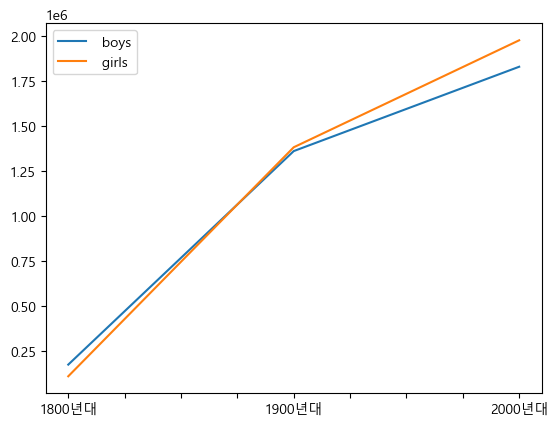

In [12]:
ym.plot()
plt.show()

```text
8. 연도별로 누가 더 많이 태어났는지(남아 vs 여아) 비교하시오
각 행에서 남아 > 여아 이면 'Boy', 아니면 'Girl'을 출력.
출력결과( 결과는 데이터프레임)

- 년도 결과
----------------
1800 boy
1801 boy
....
2100 girl

In [13]:
birthDF['출생량']=birthDF.apply(lambda v: 'boys' if v[' boys']>v[' girls'] else 'girls',axis=1)
birthDF[['출생량']]

,출생량
year,
1880,girls
1881,girls
1882,girls
1883,boys
1884,boys
...,...
2007,girls
2008,girls
2009,girls


09. 총 출생아 수 기준 가장 많은  년도를 구하시요

In [15]:
birthDF.drop(columns=['출생량'], inplace=True)

In [22]:
birthDF[ birthDF.sum(axis=1) == birthDF.sum(axis=1).max()].index.to_list()

[1957]

10. 여아 수가 남아 수보다 많은 연도만 추출하시오.

In [25]:
birthDF[ birthDF[' boys']<birthDF[' girls'] ].index.to_list()

[1880,
 1881,
 1882,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011]

11. 남아 증가량(전년 대비 변화율)을 계산하시오

In [26]:
birthDF[[' boys']].pct_change()

,boys
year,
1880,NaN
1881,0.010561
1882,0.172869
1883,0.041456
1884,0.148690
...,...
2007,0.011033
2008,-0.016762
2009,-0.028777


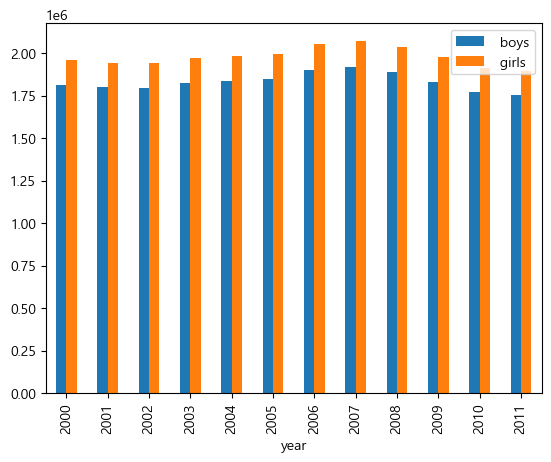

In [3]:
# 12. 2000대이후 남아 여아 바차트를 그리시요 ( df.plot(kind='bar') 이용)
birthDF.loc[2000:].plot(kind='bar')
plt.show()